# Admission Predictrion

## Data Description

#### The dataset contains several parameters which are considered important during the application for Masters Programs.




GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose(SOP) and (LOR)Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 ) outcome feature to predict

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Admission_Predict.csv ")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Data Pre-Processing

In [5]:
df.shape

(400, 9)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

## Data Visualization

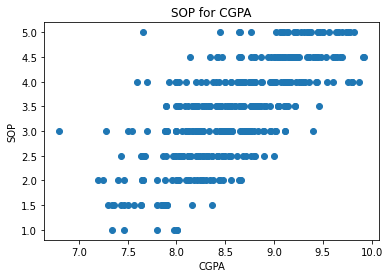

In [9]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

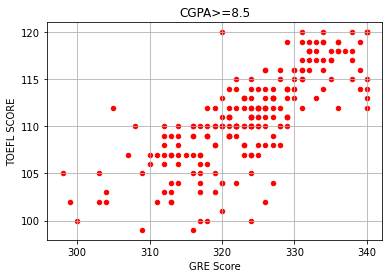

In [10]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

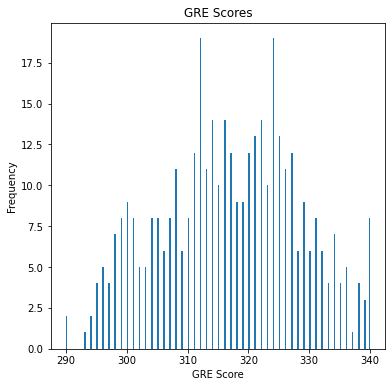

In [11]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

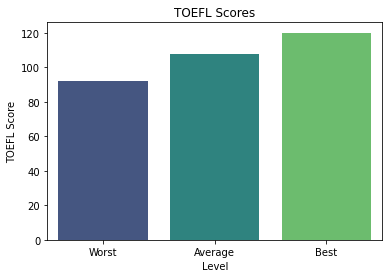

In [14]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
sns.barplot(x,y, palette='viridis')
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

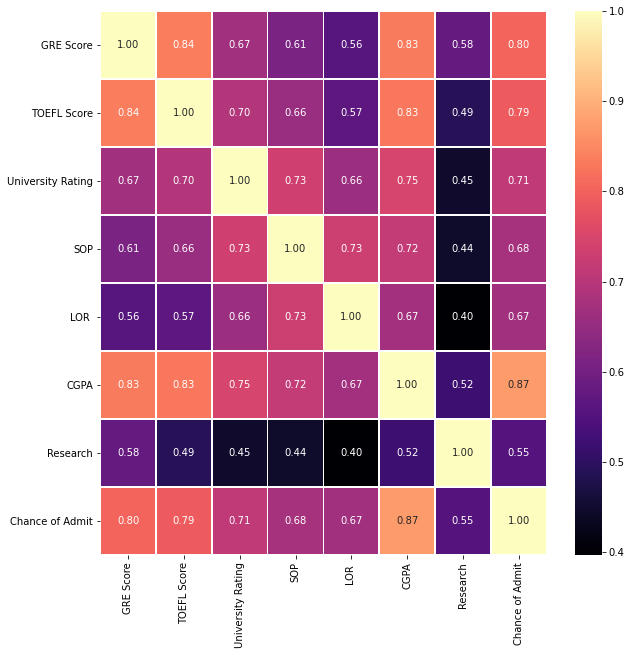

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.2f',cmap="magma")
plt.show()

In [16]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

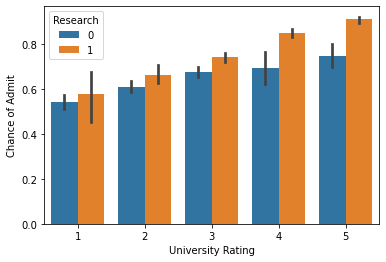

In [17]:
sns.barplot(x="University Rating", y="Chance of Admit", hue="Research", data=df)

## Spliting into training and testing (feature and labels)

In [18]:
y = df["Chance of Admit"]

x = df.drop(["Chance of Admit"],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_predict = model.predict(x_test)

score=model.score(x_test, y_test)
print(score)

0.8212082591486992


## RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_predict_rfr = rfr.predict(x_test) 

score_rfr=rfr.score(x_test, y_test)
print(score_rfr)

0.8096426648595173


## BY ANALYSIS
### We can see Linear Regression give Higher accuracy score.